<h3>Making necessary imports</h3>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
import plotly.express as px
import plotly.figure_factory as ff

2021-10-08 03:07:31.779414: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-08 03:07:31.779530: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<h3> Reading and a bit exploring data </h3>

In [2]:
df=pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv', index_col='car_ID')
df.head(10)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [4]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<h3> Data processing </h3>

In [5]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

As we can see, there is no missing data

In [6]:
df.duplicated(subset=df.columns).sum()

0

No duplicate values as well. Let's make the following:

1) Drop unnecessary columns <br>
2) Change columns with string data to integer <br>
3) Perform feature scaling <br>
4) Split data for train and test <br>

In [7]:
encoder = LabelEncoder()

df['fueltype'] = encoder.fit_transform(df['fueltype'])
df['aspiration'] = encoder.fit_transform(df['aspiration'])
df['doornumber'] = encoder.fit_transform(df['doornumber'])
df['carbody'] = encoder.fit_transform(df['carbody'])
df['drivewheel'] = encoder.fit_transform(df['drivewheel'])
df['enginelocation'] = encoder.fit_transform(df['enginelocation'])
df['enginetype'] = encoder.fit_transform(df['enginetype'])
df['cylindernumber'] = encoder.fit_transform(df['cylindernumber'])
df['fuelsystem'] = encoder.fit_transform(df['fuelsystem'])

In [8]:
del df['CarName']

In [9]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,1,0,1,2,2,0,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,1,0,0,3,1,0,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,1,0,0,3,0,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
X = df[df.columns[:-1]]
y = np.array(df['price'])

In [11]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))

X = scaler.fit_transform(X)

In [15]:
X.shape

(205, 23)

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)

<h3> Trying different regression techniques</h3>

Simple Linear Regression

In [17]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

print("Score: ", round(model1.score(X_test,y_test)*100,3), "%")

Score:  80.811 %


In [20]:
y_test_prd = model1.predict(X_test)
y_test_prd

array([10280.34479184, 30323.98600097, 19977.7478338 ,  7235.4247639 ,
        6965.1004705 , 10412.38712837,  9741.85823916,  5243.20553777,
        5556.30958839,  6022.10499203,  8063.23216823, 15205.48432466,
        6816.0167353 ,  5818.71456   ,  6494.79729827, 11218.8950997 ,
       11434.17867422,  7913.95155727,  7387.07822304,  5735.99396433,
       12717.71881929,  9458.52367332,  4503.97478579,  5579.94145049,
       21371.33940983, 22227.40637972,  7387.59480952,  8267.64576068,
       31352.90031123,  7840.23894905,  9168.37402102,  8679.67819321,
        4823.82415795,  9335.70001037, 12278.653617  ,  9494.71939573,
        5502.06352605,  6391.17919948, 10417.45073228, 16313.25408946,
        6535.50934047, 15938.53598948, 21474.2198729 ,  6274.83558832,
       12916.93287506, 10616.37899251, 21677.78808865, 10570.03671827,
       10324.9778268 ,  8592.32512378, 16073.98692537, 11153.48807781])

In [27]:
y_test_prd.size
print(X_test.shape)

(52, 23)


This is a multivarible regression, so it cannot be plotted

ValueError: x and y must be the same size

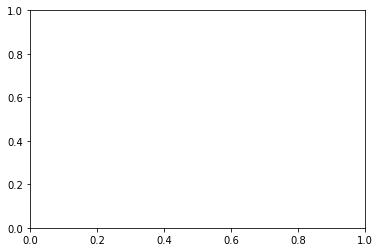

In [24]:
import matplotlib.pyplot as plt
plt.scatter(np.squeeze(X_test),np.squeeze(y_test), color='red', alpha=0.2)
plt.scatter(np.squeeze(X_test), y_test_prd, color='green')
plt.show()

Decision Tree Regressor

In [28]:
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

print("Score: ", round(model2.score(X_test, y_test)*100,3),"%") #better than previous one

Score:  88.401 %


Random Forest Regressor

In [29]:
model3 = RandomForestRegressor(max_depth=7)
model3.fit(X_train, y_train)

print("Score: ", round(model3.score(X_test, y_test)*100,3),"%") #even better

Score:  95.485 %


<h4> Neural Networks </h4>

In [30]:
model4 = Sequential()
model4.add(InputLayer(input_shape=(23,)))
    
model4.add(Dense(128,activation="relu",kernel_initializer="normal"))
model4.add(Dense(128,activation="relu",kernel_initializer="normal"))
model4.add(Dense(64,activation="relu",kernel_initializer="normal"))
model4.add(Dense(32,activation="relu",kernel_initializer="normal"))


optim = Adam(
    learning_rate=0.00055,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
)

model4.add(Dense(1,activation="linear",kernel_initializer="normal"))
model4.compile(loss="mse",optimizer= optim,metrics="mae")

2021-10-08 03:38:03.125747: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-08 03:38:03.129598: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-08 03:38:03.129643: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-08 03:38:03.129676: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (59252e1c2fba): /proc/driver/nvidia/version does not exist
2021-10-08 03:38:03.130700: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

In [31]:
model4.fit(X_train,y_train,batch_size=16,epochs=1000,validation_data=(X_test,y_test))

Epoch 951/1000
10/10 [==============================] - 0s 7ms/step - loss: 5868426.5114 - mae: 1562.6845 - val_loss: 3061368.0000 - val_mae: 1271.9065
Epoch 952/1000
10/10 [==============================] - 0s 8ms/step - loss: 5942009.6364 - mae: 1711.1059 - val_loss: 3002949.5000 - val_mae: 1262.6238
Epoch 953/1000
10/10 [==============================] - 0s 8ms/step - loss: 5396322.8182 - mae: 1669.0310 - val_loss: 3079830.7500 - val_mae: 1275.2648
Epoch 954/1000
10/10 [==============================] - 0s 7ms/step - loss: 5006581.0000 - mae: 1593.0421 - val_loss: 3060391.7500 - val_mae: 1271.7244
Epoch 955/1000
10/10 [==============================] - 0s 7ms/step - loss: 5074469.4091 - mae: 1532.0430 - val_loss: 3158950.2500 - val_mae: 1286.6353
Epoch 956/1000
10/10 [==============================] - 0s 7ms/step - loss: 5885912.1818 - mae: 1652.6833 - val_loss: 3108603.5000 - val_mae: 1277.8751
Epoch 957/1000
10/10 [==============================] - 0s 8ms/step - loss: 3808570.5000

In [32]:
predictions = model4.predict(X_test)

print("Score: ",metrics.r2_score(y_test,predictions)*100)

Score:  89.77954708246637


As we can see mean average error oscillates (mainly) between 1200-1300 , most probably there are lots of local minimums at which network stacks. I am pretty sure model can be improved after some tuning, but for now let me live current results like that. 

<h4> Sample Demonstration </h4>

Lets as an example take Random Forest Regressor and Neural Network models to compare result for random test sample.

In [33]:
random_index = np.random.randint(0,X_test.shape[0])


print("Prediction made by Random Forest Regressor:")
print("\t\tPredicted price:  ", np.round(model3.predict(X_test[random_index:random_index+1])[0],3))
print("\t\tActual price:  ", np.round(y_test[random_index],3))

print("Prediction made by Neural Networks:")
print("\t\tPredicted price:  ", np.round(model4.predict(X_test[random_index:random_index+1])[0][0],3))
print("\t\tActual price:  ", np.round(y_test[random_index],3))

Prediction made by Random Forest Regressor:
		Predicted price:   7389.516
		Actual price:   7799.0
Prediction made by Neural Networks:
		Predicted price:   7171.724
		Actual price:   7799.0


<p style="font-family:verdana;font-size: 120%"> In conclusion, results show that in this particular problem Random Forest Regressor best predicts car price; however, I still want to believe that we can achieve the same results (may be even better) with Neural Networks. In my case I have used simple one, but it can be extended and tuned. At any rate, what makes Random Forest algorithm in this case extremely powerfull is that it does great job first of all in price prediction and unlike Neural Networks, it is light weight, so for this particular problem with such amount of data it is trained faster </p>